<h1>Linear Regession - Week 1</h1>

<h3>First we import the libraries which we require. </h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h4>Now we will define the functions which we will need for the entire program. This is a very good programming practice and it will always help you when you have to execute the same set of commands multiple times.</h4>

In [2]:
def loadData(fln):
    print(fln)
    data = np.matrix(np.loadtxt(fln, delimiter=',',skiprows=1))
    return (data[:,0],data[:,1])

In [3]:
def Cost(theta, x,y):
    m = y.size
    h = np.matmul(x,theta)
    return np.sum(np.power(np.subtract(h,y),2)) / (2*m)

In [4]:
def gradientdescent(x,y,theta,alpha,iters):
    m = np.size(y)
    h = np.matmul(x, theta)
    c1 = Cost(theta, x, y)
    for i in range(0,iters):
        temp = (alpha / m) * np.matmul(x.T, (h - y))
        c2 = Cost(theta - temp,x,y)
        if c1 > c2:
            c1 = c2
            theta = theta - temp
    return theta

<h4>Now that we are done defining the functions, we can start preparing the data and variables required for performing linear regression.<br>We will define x and y variables and find out m according to that (x,y & m are features, target and no. of examples respectively).</h4>

In [5]:
X,Y = loadData(r"../../Datasets/Random Linear Regression/2/train.csv")
m = Y.size
t = X

../../Datasets/Random Linear Regression/2/train.csv


<h4>Now we will add a column of 1s to the feature matrix which is (theta0), and as we know it is 1 in simple linear regression.</h4>

In [6]:
X = np.hstack((np.matrix(np.ones(m).reshape(m,1)),t))

<h4>Now we will initialize the weight theta which will be a matrix containing two elements. Namely, theta0 and theta1.<br>After this we will perform gradient descent on the data by providing the function, the feature matrix, target matrix, the learning rate and the number of iterations.<br>After the gradient descent procedure, we will calculate the final cost of our model and print it.</h4>

In [7]:
theta = np.matrix(np.ones(2).reshape(2,1))
theta = gradientdescent(X, Y, theta, 0.000001,100000)
Cost(theta, X, Y)

4.101603869343038

<h4>We first print our final theta matrix.<br>These are the values of theta according to which our hypothesis is going to be plotted. In simple words, these are the coefficients of a function, which is the perfect (not exactly) fit for our model.<br>We then go on and display our training data using a scatter plot.<br>After which we plot our straight line (our hypothesis function) over the scattered data points. This line is our model.</h4>

[[0.99967563]
 [0.98397884]]


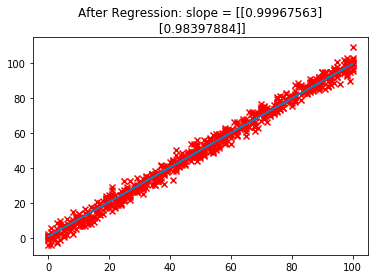

4.101603869343038


In [8]:
print(theta)
plt.scatter(np.array(t), np.array(Y), marker='x', color='r')
plt.plot(np.array(t),np.array(np.matmul(X, theta)))
plt.title("After Regression: slope = " + str(theta))
plt.show()
print(Cost(theta, X, Y))

<h4>Now that we know how exactly this works, we will quickly find test out model on the test data.</h4>

../../Datasets/Random Linear Regression/2/test.csv


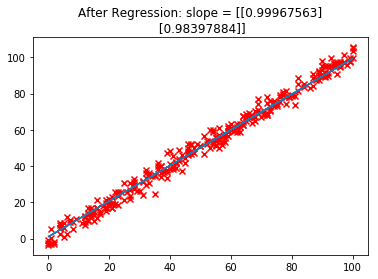

4.958853382803004


In [10]:
X, Y = loadData(r"../../Datasets/Random Linear Regression/2/test.csv")
m = Y.size
t = X
X = np.hstack((np.matrix(np.ones(m).reshape(m,1)),t))
plt.scatter(np.array(t), np.array(Y), marker = 'x', color='r')
plt.plot(np.array(t), np.array(np.matmul(X, theta)))
plt.title("After Regression: slope = " + str(theta))
plt.show()
print(Cost(theta, X, Y))

<h4>Here we get a mean squared error of 4.9588..., which is pretty good considering the kind of data we had.<h4>

<h3>This wraps up the Linear Regression section of Andrew Ng's Course.</h3>